EE21S061 Arihant Jain Lab 7 for EE5175 course:

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
from numpy.fft import fftshift, fft,ifft2
import math

Importing all the neccessary libraries here. Also I am importing fft function from numpy to compute 1-D DFT as mentioned in the lab assignement according to row column decomposition.

In [14]:
from matplotlib import pyplot as plt
import random
%matplotlib inline


plt.rcParams['figure.figsize'] = [18, 10] 

fourier = imread('fourier.png')
fourier_trans = imread('fourier_transform.png')
peppers = imread('peppers_small.png')

After importing the image we can visualize them to see what we will be working with

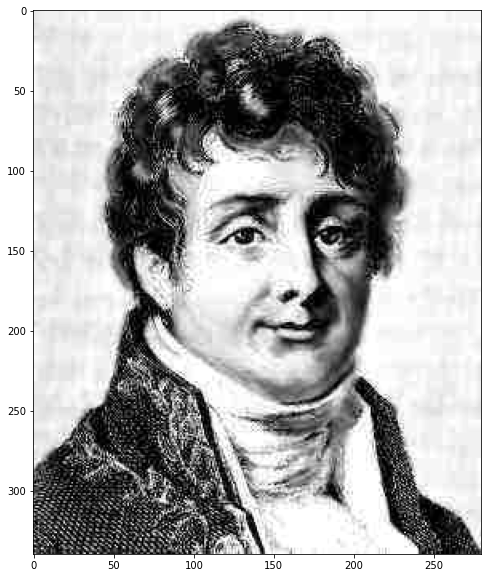

In [23]:
plt.imshow(fourier,cmap="gray")

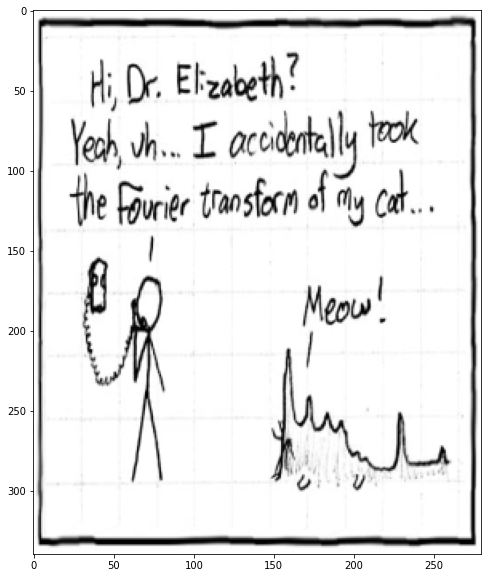

In [16]:
plt.imshow(fourier_trans,cmap="gray")

# Q1. Implementing 2-D DFT

Implementing 2-D DFT using 1-D DFT transform. Here i am using 1-D DFT transform which is being computed using numpy.fft function this is done first across row and then across column which results in 2-D DFT transform of the given image.

In [97]:
def dft_2D(image):
    row_transform = fft(image, axis=1)
    #applied fft function across row by setting axis = 1 in 1st call of fft and then to axis = 2 for second call  
    final_transform = fft(row_transform, axis=0)
    #This gives us the final Transform which can now be shifted using fftshift
    final_transform = fftshift(final_transform)
    #To get magnitude of the transform we can just use numpy abs
    mag = np.abs(final_transform)
    #and To compute Phase we can perform tan inverse (imaginary/real) part of the final Transform
    phase=np.arctan2(final_transform.imag,final_transform.real)
    #Finally we return the magnitude,phase and transform.
    return mag, phase, final_transform


In [98]:
mag,phase,transform=dft_2D(fourier)

Text(0.5, 1.0, 'Magnitude')

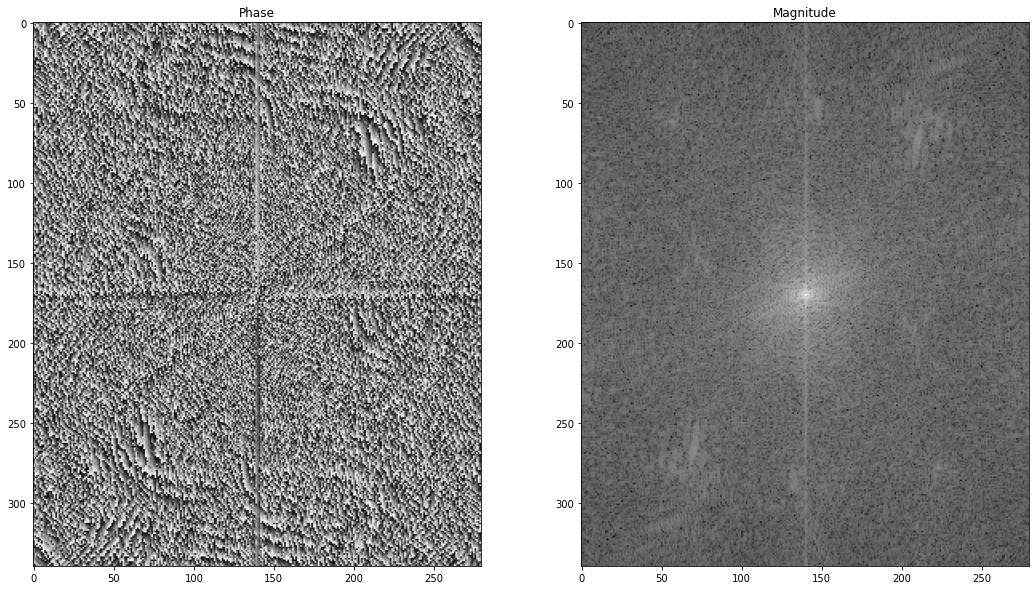

In [106]:
figure, axis = plt.subplots(1,2)
axis[0].imshow(phase,cmap="gray")
axis[0].set_title("Phase")
axis[1].imshow(np.log(mag),cmap="gray")
axis[1].set_title("Magnitude")


The above image helps us see what results we got from our 2-D DFT implementation. I am not sure what can be understood by them but lets see can we get back our original image from these.

In [132]:
mag,phase,transform=dft_2D(fourier_trans)

Text(0.5, 1.0, 'Magnitude')

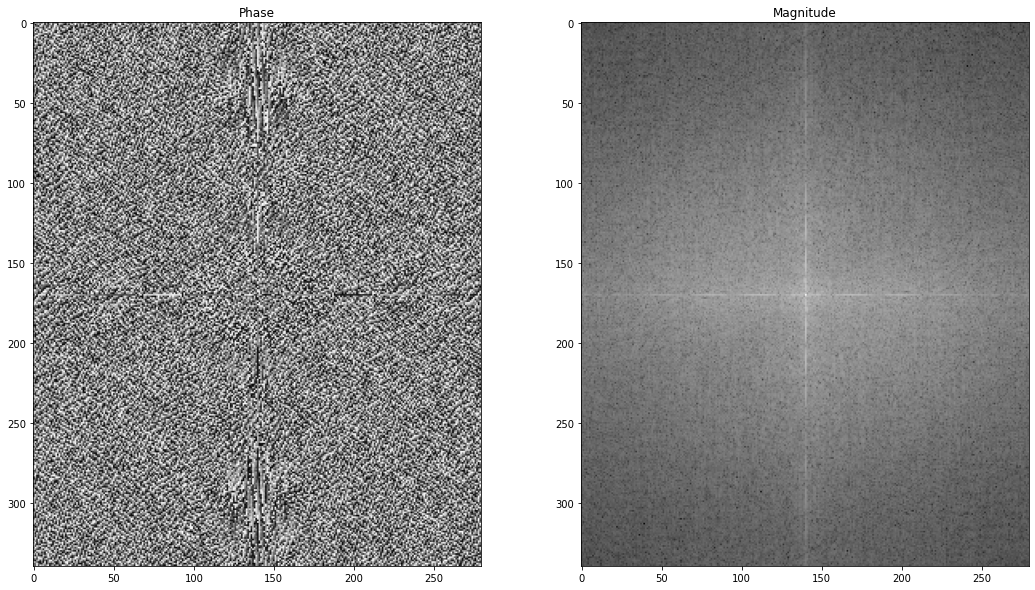

In [133]:
figure, axis = plt.subplots(1,2)
axis[0].imshow(phase,cmap="gray")
axis[0].set_title("Phase")
axis[1].imshow(np.log(mag),cmap="gray")
axis[1].set_title("Magnitude")


Text(0.5, 1.0, 'Based on Inverse DFT')

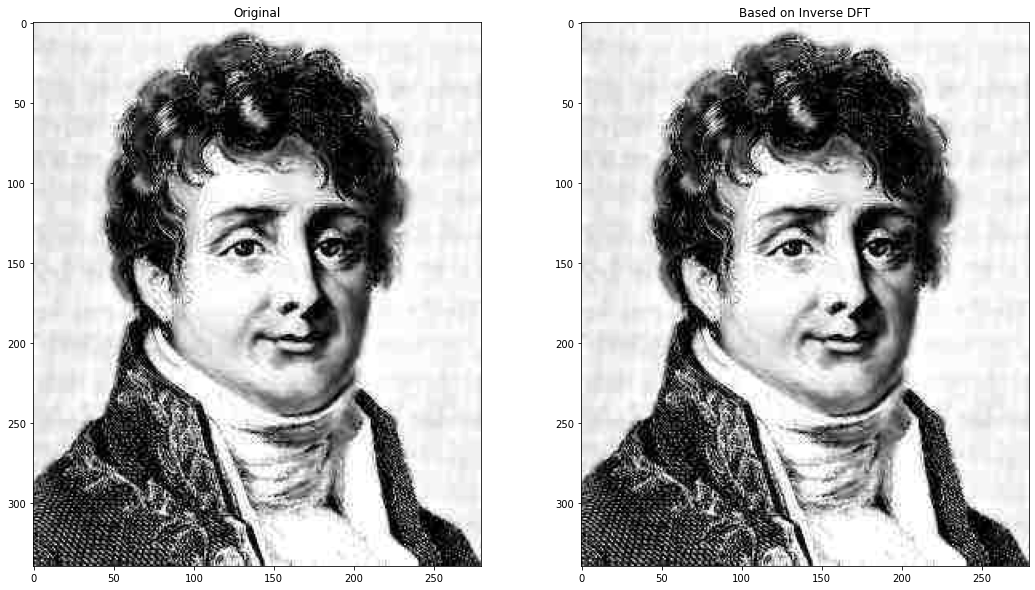

In [109]:
figure, axis = plt.subplots(1,2)
axis[0].imshow(fourier,cmap="gray")
axis[0].set_title("Original")
axis[1].imshow(np.abs(ifft2(transform)),cmap="gray")
axis[1].set_title("Based on Inverse DFT")

This gives us confidence on the working of the 2-D DFT function implementation. Lets try to inverse the images now using interchanged phase and magnitude for the 2 images.


# Q2. Computing new DFT and inversing them to get to new images.

The idea now is to prove the theory of phase dominance and also visualizing seeing how these operation affect the image in question.

$$ F_1(k,l)=|F_1(k,l)|\exp^{j\phi_1(k,l)} $$

Here $|F_1(k,l)|$ represent magnitude and $\phi_1(k,l)$ represent phase now that we have these 2 components of each image we can reconstruct new DFT Transform based on magnitude and phase interchanged between the image.

So that would look like.

### Phase of image 2 with magnitude of image 1
$$ F_3(k,l)=|F_1(k,l)|\exp^{j\phi_2(k,l)} $$

### Phase of image 1 with magnitude of image 2
$$ F_4(k,l)=|F_2(k,l)|\exp^{j\phi_1(k,l)} $$

In [126]:
def dft_2D_from_mag_phase(magnitude, phase):
    #Here i am just computing new DFT based on magnitude and phase we computed before
    return magnitude*np.exp(1j*phase)

def idft_2D(magnitude, phase):
    #Here i am just computing new DFT based on magnitude and phase we computed before
    dft = magnitude*np.exp(1j*phase)
    #Shifting the dft matrix and then repeating the same operation we did before to get our DFT
    dft = fftshift(dft)
    row_transform = fft(dft, axis=1)
    final_transform = fft(row_transform, axis=0)
    mag = np.abs(final_transform)
    #property that taking DFT of the DFT of an image results in
    # a flipped image. undo the flipping effect
    mag = mag[::-1, ::-1]
    return mag

In [127]:
mag_1,phase_1,transform_1=dft_2D(fourier)

In [128]:
mag_2,phase_2,transform_2=dft_2D(fourier_trans)

In [129]:
dft3=dft_2D_from_mag_phase(mag_1,phase_2)

In [130]:
dft4=dft_2D_from_mag_phase(mag_2,phase_1)

Text(0.5, 1.0, 'Image 1')

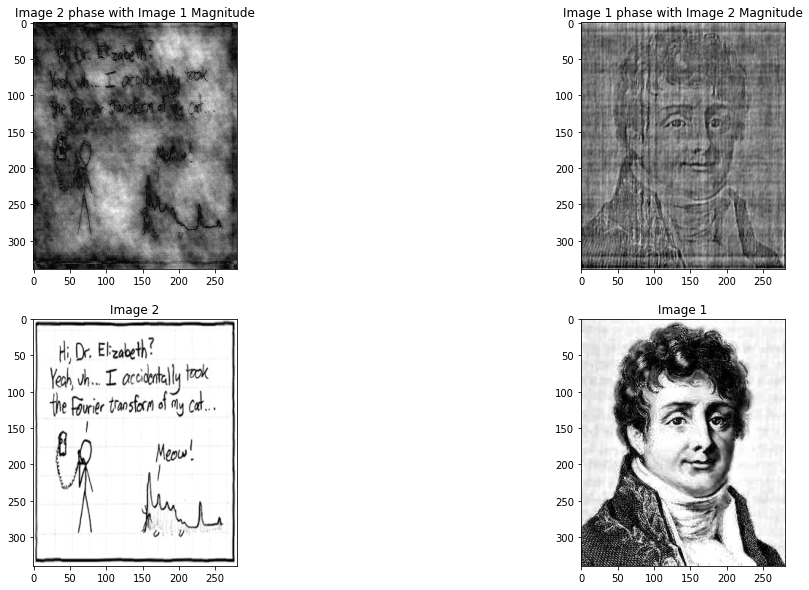

In [131]:
figure, axis = plt.subplots(2,2)
axis[0][0].imshow(np.abs(idft_2D(mag_1,phase_2)),cmap="gray")
axis[0][0].set_title("Image 2 phase with Image 1 Magnitude")
axis[0][1].imshow(np.abs(idft_2D(mag_2,phase_1)),cmap="gray")
axis[0][1].set_title("Image 1 phase with Image 2 Magnitude")
axis[1][0].imshow(fourier_trans,cmap="gray")
axis[1][0].set_title("Image 2")
axis[1][1].imshow(fourier,cmap="gray")
axis[1][1].set_title("Image 1")


We can see how the image we see in inverse DFT turns out to be the one which phase we are using for computing the DFT this shows us the property of phase dominance in DFT.